In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
##
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
df=pd.read_csv('houseprice.csv')

In [3]:
df.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,Utilities,Neighborhood,Condition1,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,AllPub,CollgCr,Norm,1Fam,2Story,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,RL,80.0,9600,Pave,Reg,AllPub,Veenker,Feedr,1Fam,1Story,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,RL,68.0,11250,Pave,IR1,AllPub,CollgCr,Norm,1Fam,2Story,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,RL,60.0,9550,Pave,IR1,AllPub,Crawfor,Norm,1Fam,2Story,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,RL,84.0,14260,Pave,IR1,AllPub,NoRidge,Norm,1Fam,2Story,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 68)

In [5]:
df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   Condition1     1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  RoofMatl       1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  MasVnrType     588 non-null    object 
 18  ExterQua

In [7]:
df.isnull().sum()
miss_val = df.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100))
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent
MasVnrType,872,59.73
LotFrontage,259,17.74
GarageFinish,81,5.55
GarageType,81,5.55
GarageQual,81,5.55
GarageCond,81,5.55
GarageYrBlt,81,5.55
BsmtFinType2,38,2.60
BsmtExposure,38,2.60
BsmtQual,37,2.53


In [8]:
df = df.drop(['Fence', 'MiscFeature', 'PoolQC','FireplaceQu','Alley'], axis=1)

KeyError: "['Fence', 'MiscFeature', 'PoolQC', 'FireplaceQu', 'Alley'] not found in axis"

In [39]:
#Drop rows with any missing values
df.dropna(inplace=True)

In [40]:
df.isnull().sum()   

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [41]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
11,12,60,RL,85.0,11924,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2006,New,Partial,345000


In [58]:
df = df.drop(['Id','MSSubClass', 'LandContour','LotConfig','LandSlope','Condition2','Exterior2nd','MasVnrArea','MasVnrArea','ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','GrLivArea',''], axis=1)

In [59]:
df.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,Utilities,Neighborhood,Condition1,Condition2,BldgType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LogOfPrice
0,RL,65.0,8450,Pave,Reg,AllPub,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
2,RL,68.0,11250,Pave,IR1,AllPub,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
4,RL,84.0,14260,Pave,IR1,AllPub,NoRidge,Norm,Norm,1Fam,...,0,0,0,0,0,12,2008,WD,Normal,12.429216
6,RL,75.0,10084,Pave,Reg,AllPub,Somerst,Norm,Norm,1Fam,...,0,0,0,0,0,8,2007,WD,Normal,12.634603
11,RL,85.0,11924,Pave,IR1,AllPub,NridgHt,Norm,Norm,1Fam,...,0,0,0,0,0,7,2006,New,Partial,12.751300


In [42]:
df.shape


(455, 76)

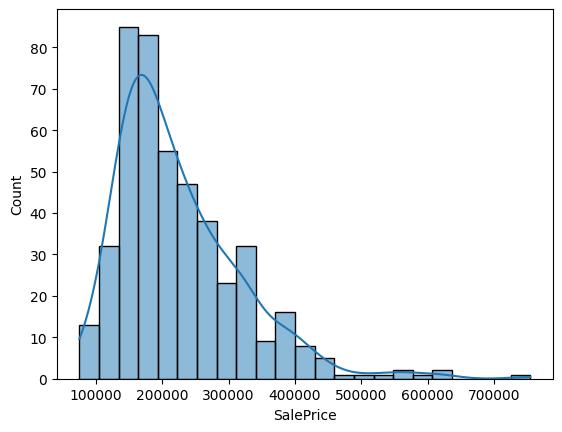

In [43]:
sns.histplot(df.SalePrice, kde=True)  # Add `kde=True` to include the kernel density estimate.
plt.show()

In [44]:
 #sns.distplot(df.SalePrice)

In [45]:
df['LogOfPrice'] = np.log(df.SalePrice)
df.drop(["SalePrice"], axis=1, inplace=True)

In [46]:
#df.skew().sort_values(ascending=False)

In [47]:
# set the target and predictors
y = df.LogOfPrice  # target

# use only those input features with numeric data type 
df_temp = df.select_dtypes(include=["int64","float64"]) 
X = df_temp.drop(["LogOfPrice"],axis=1)  # predictors

In [48]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 3)

In [49]:
lr = LinearRegression()
# fit optimal linear regression line on training data, this performs gradient descent under the hood
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
yr_hat = lr.predict(X_test)

In [51]:
# evaluate the algorithm with a test set 
lr_score = lr.score(X_test, y_test)  # train test 
print("Accuracy: ", lr_score)

Accuracy:  0.8583743620607998


In [52]:
print("MSE:", mean_squared_error(y_test, yr_hat))

MSE: 0.01950901741326631


In [53]:
# cross validation to find 'validate' score across multiple samples, automatically does Kfold stratifying
lr_cv = cross_val_score(lr, X, y, cv = 5, scoring= 'r2')
print("Cross-validation results: ", lr_cv)
print("R2: ", lr_cv.mean())

Cross-validation results:  [0.86179324 0.75396783 0.69743321 0.86432327 0.27489253]
R2:  0.6904820157282794


In [54]:
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
rf = RandomForestRegressor(random_state=3).fit(X_train, y_train)

In [55]:
print("Ridge R2:", ridge.score(X_test, y_test))
print("Lasso R2:", lasso.score(X_test, y_test))
print("Random Forest R2:", rf.score(X_test, y_test))

Ridge R2: 0.8596220567393127
Lasso R2: 0.8238058545692594
Random Forest R2: 0.8840068268717691


In [56]:
def predict_house_price():
    print("Enter the following house features:")
    user_input = {}
    for feature in X.columns:
        try:
            user_input[feature] = float(input(f"{feature}: "))
        except ValueError:
            print(f"Invalid value for {feature}, setting to 0 by default.")
            user_input[feature] = 0
    
    user_df = pd.DataFrame([user_input])
    log_price_prediction = rf.predict(user_df)[0]
    predicted_price = np.exp(log_price_prediction)  # Convert log price back to original scale
    print(f"\nPredicted House Price: ${predicted_price:,.2f}")

In [57]:
#predict_house_price()

Enter the following house features:


Id:  


Invalid value for Id, setting to 0 by default.


KeyboardInterrupt: Interrupted by user